# Playground

In [39]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("./code")

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

import logging
logging.basicConfig(format="%(asctime)s - %(levelname)s: %(message)s", level=logging.INFO, datefmt="%I:%M:%S")

from dataset import *
from plots import *
from models import *
from utils import *

fix_seed()

## Metadata Summary

In [41]:
metadata = load_metadata()

In [42]:
metadata.head()

,Unnamed: 0,Multi_Cell_Image_Id,Multi_Cell_Image_Name,Single_Cell_Image_Id,Single_Cell_Image_Name,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration,moa
0,0,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO
1,1,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO
2,2,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,2,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO
3,3,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,3,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO
4,4,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,4,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO


In [43]:
metadata.shape

(488396, 19)

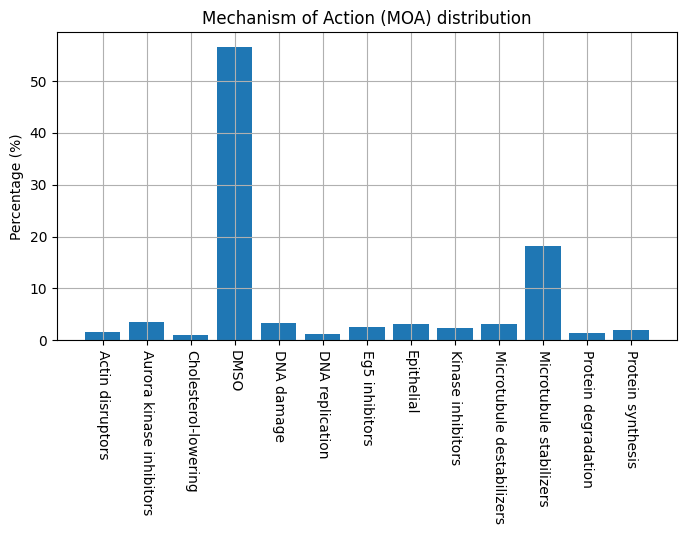

In [44]:
plot_MOA_distribution(metadata)

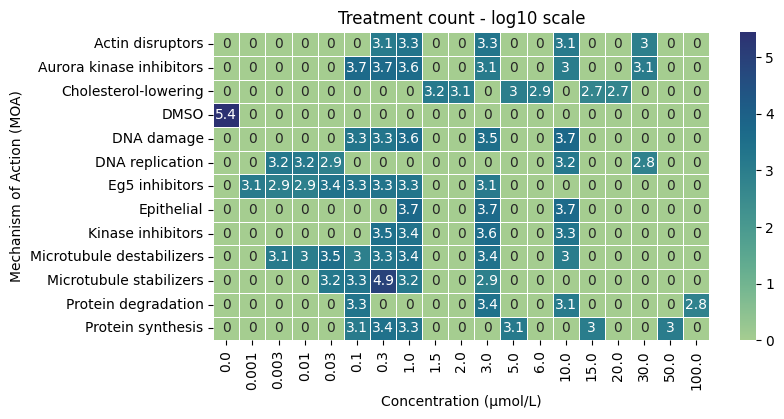

In [45]:
plot_treatment_heatmap(metadata)

## Tiny - Subset of Dataset

In [46]:
tiny_metadata = metadata[metadata["Multi_Cell_Image_Name"] == "Week10_200907_F02_s1_w14631241C-4FA2-4BC9-8693-D7D268CAEE82"]
#tiny_metadata = metadata[metadata["Multi_Cell_Image_Name"] == "B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10"]

tiny_images = load_images_from_metadata(tiny_metadata)
print(f"{tiny_metadata.shape[0]} images")

40 images


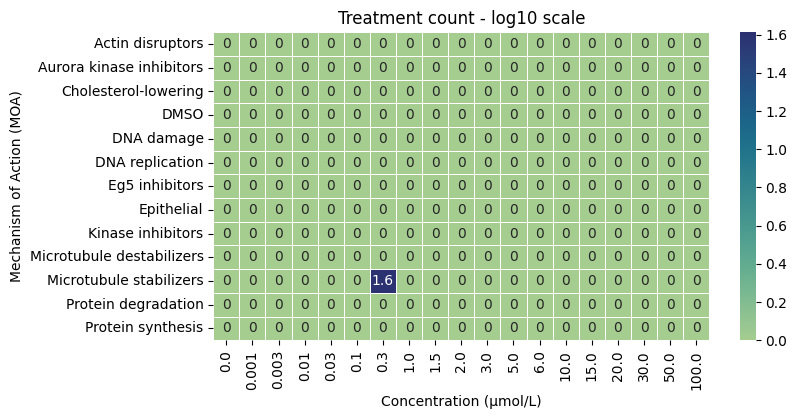

In [47]:
plot_treatment_heatmap(tiny_metadata)

## Stratified - Subset of Dataset

In [48]:
blacklist = [("Eg5 inhibitors", 0.1), ("Microtubule destabilizers", 0.3), ("Cholesterol-lowering", 6.0)]
stratified_metadata = stratify_metadata(metadata, 60, blacklist=blacklist)

stratified_images = load_images_from_metadata(stratified_metadata)
print(f"{stratified_images.shape[0]} images")

3780 images


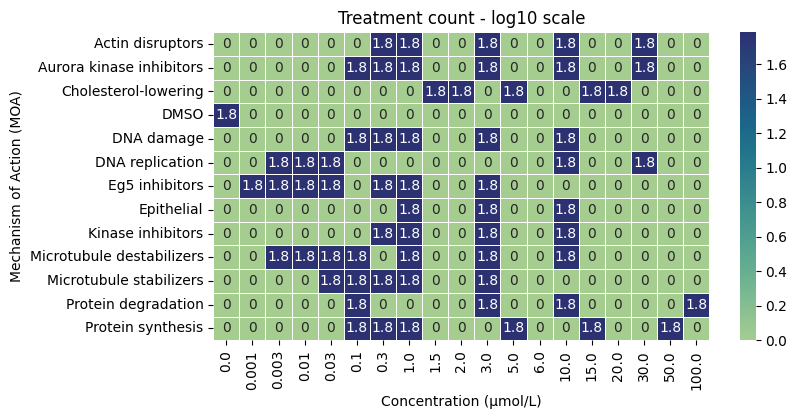

In [49]:
plot_treatment_heatmap(stratified_metadata)

## Model - Training

In [50]:
train_images = tiny_images
train_metadata = tiny_metadata

train_images = normalize_channel_wise(train_images)

In [34]:
img1 = train_images[0]

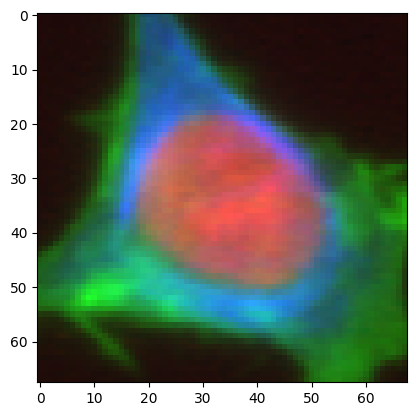

In [14]:
plot_image(img1)

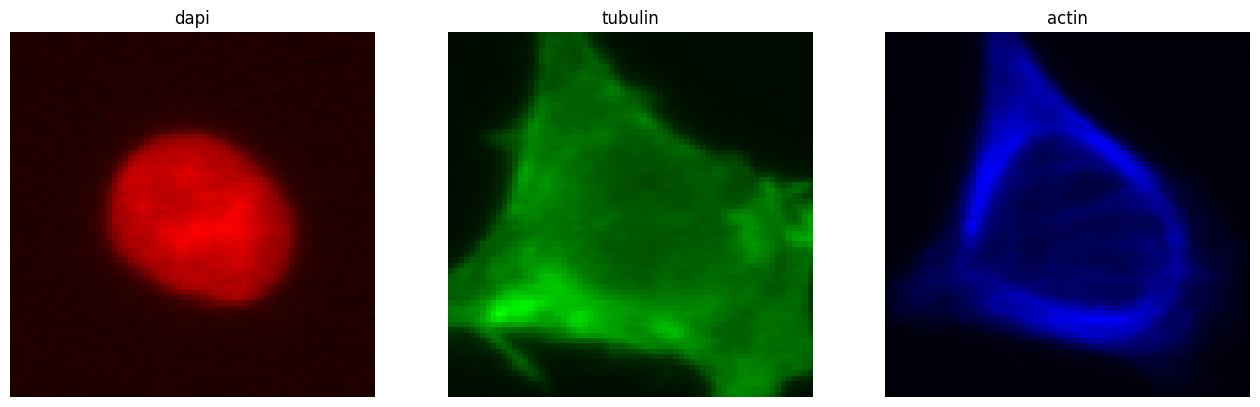

In [15]:
plot_channels(img1)

In [52]:
train_images = normalized_to_zscore(train_images)
train_images = view_cropped_images(train_images)

In [ ]:
train_conditional_diffusion_model(train_metadata, train_images, epochs=20, epoch_sample_times=2, batch_size=2)

## Model - Load pretrained

In [ ]:
unet = UNet()
unet.load_state_dict(torch.load("./models/DDPM_Unconditional/ckpt.pt"))
diffusion = Diffusion()
sampled_images = diffusion.sample(unet, n=1)

## Results

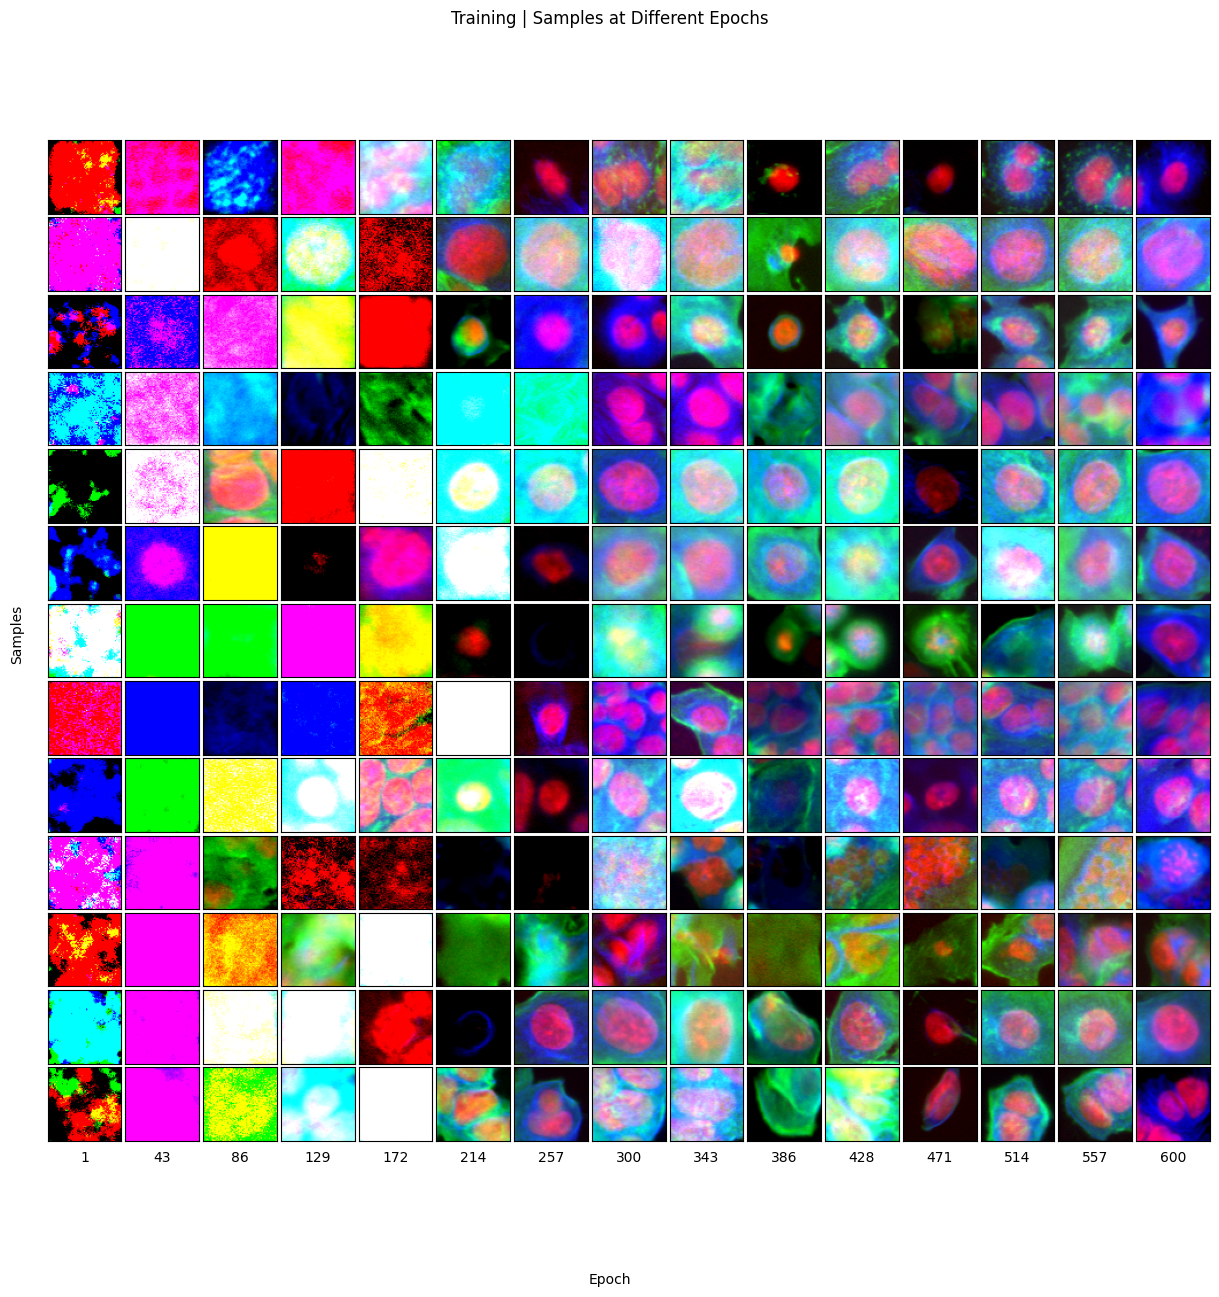

In [17]:
epoch_images, epochs = load_epoch_images("./results/DDPM_Conditional/")
plot_epoch_sample_series(epoch_images, epochs)

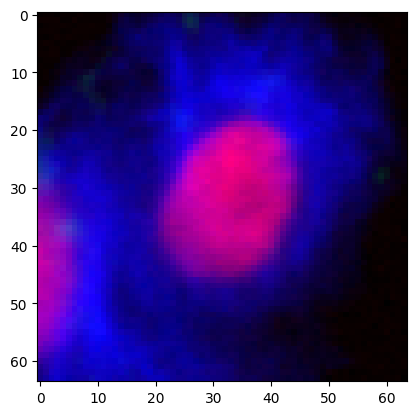

In [18]:
plot_image(epoch_images[-1][0])